In [ ]:
import pandas as pd
import numpy as np

Загрузка данных.

In [ ]:
# Папка с данными: https://drive.google.com/drive/folders/1UJG4XVB756HgqD4AhbNnYVlk_4lBiTKc
# Файл — out.csv
#data_url = 'https://docs.google.com/spreadsheets/d/1Y9Z-i5YGQob5r5tR8fF-UQNXH8waDGexeVBKz0XOGTk/export?format=csv&id=1Y9Z-i5YGQob5r5tR8fF-UQNXH8waDGexeVBKz0XOGTk&gid=920650402'
data_url = 'https://docs.google.com/spreadsheets/d/1laSpq2WiDuOwxYlm-jGg2Xpix3bgd5cryEpNI6XnSbw/export?format=csv&id=1laSpq2WiDuOwxYlm-jGg2Xpix3bgd5cryEpNI6XnSbw&gid=72133023'
data = pd.read_csv(data_url) # , on_bad_lines = 'skip'
data.head()

,Unnamed: 0,Unnamed: 0.1,id,meta1,meta2,meta3,vector
0,0,0,5a53100a00b74d5c275e194937bb303d,REQUEST_GET_ARGS,banner,200.0,"<a href=""http://kinoshca.ru""><img src="""" bord..."
1,1,1,5096203c9c43953c09836cb671fc7493,RESPONSE_HEADERS,RESPONSE_HEADERS.Date,200.0,"Tue, 30 Jan 2018 14:56:31 GMT"
2,2,2,94fe33d7ac1b2870ba18b55422d0d193,REQUEST_COOKIES,REQUEST_COOKIES.LtpaToken2,302.0,y3CYC4GuiLC2LEOQs1UQUpkxB M9FIlAfZleMtvbuWnbOO...
3,3,3,293db4676cb2b5e8da2181840de9c1a0,CLIENT_SESSION_ID,NaN,206.0,"\""151209838cd7329d5c370769ad8e4c19732bd7f6fec6..."
4,4,4,f9b6968f4d420270428a8a4dca24a293,CLIENT_USERAGENT,NaN,301.0,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...


## Preprocessing

### Очистка данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7036 entries, 0 to 7035
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    7036 non-null   object 
 1   Unnamed: 0.1  7028 non-null   object 
 2   id            7015 non-null   object 
 3   meta1         7015 non-null   object 
 4   meta2         5520 non-null   object 
 5   meta3         6985 non-null   float64
 6   vector        6980 non-null   object 
dtypes: float64(1), object(6)
memory usage: 384.9+ KB


id, meta1, meta3 и vector — NaN очень в малом количестве строк. Уберем эти строки.

In [ ]:
data.dropna(subset=('id', 'meta1', 'meta3', 'vector'), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6980 entries, 0 to 7035
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6980 non-null   object 
 1   Unnamed: 0.1  6980 non-null   object 
 2   id            6980 non-null   object 
 3   meta1         6980 non-null   object 
 4   meta2         5500 non-null   object 
 5   meta3         6980 non-null   float64
 6   vector        6980 non-null   object 
dtypes: float64(1), object(6)
memory usage: 436.2+ KB


Столбцы 'Unnamed: 0" и 'Unnamed: 0.1' не содержат полезной информации. Удалим их

In [ ]:
data.drop('Unnamed: 0', inplace=True, axis=1)
data.drop('Unnamed: 0.1', inplace=True, axis=1)
data.head()

,id,meta1,meta2,meta3,vector
0,5a53100a00b74d5c275e194937bb303d,REQUEST_GET_ARGS,banner,200.0,"<a href=""http://kinoshca.ru""><img src="""" bord..."
1,5096203c9c43953c09836cb671fc7493,RESPONSE_HEADERS,RESPONSE_HEADERS.Date,200.0,"Tue, 30 Jan 2018 14:56:31 GMT"
2,94fe33d7ac1b2870ba18b55422d0d193,REQUEST_COOKIES,REQUEST_COOKIES.LtpaToken2,302.0,y3CYC4GuiLC2LEOQs1UQUpkxB M9FIlAfZleMtvbuWnbOO...
3,293db4676cb2b5e8da2181840de9c1a0,CLIENT_SESSION_ID,NaN,206.0,"\""151209838cd7329d5c370769ad8e4c19732bd7f6fec6..."
4,f9b6968f4d420270428a8a4dca24a293,CLIENT_USERAGENT,NaN,301.0,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...


Все значения столбца 'id' уникальны.

In [ ]:
data['id'].is_unique

True

На всякий случай проверим, длина всех ли id равна 32.

In [ ]:
data[data['id'].str.len() != 32]

,id,meta1,meta2,meta3,vector


Так как столбец 'id' не содержит полезной информации, удалим его.

In [ ]:
data.drop('id', axis=1, inplace=True)
data.head()

,meta1,meta2,meta3,vector
0,REQUEST_GET_ARGS,banner,200.0,"<a href=""http://kinoshca.ru""><img src="""" bord..."
1,RESPONSE_HEADERS,RESPONSE_HEADERS.Date,200.0,"Tue, 30 Jan 2018 14:56:31 GMT"
2,REQUEST_COOKIES,REQUEST_COOKIES.LtpaToken2,302.0,y3CYC4GuiLC2LEOQs1UQUpkxB M9FIlAfZleMtvbuWnbOO...
3,CLIENT_SESSION_ID,NaN,206.0,"\""151209838cd7329d5c370769ad8e4c19732bd7f6fec6..."
4,CLIENT_USERAGENT,NaN,301.0,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...


Посмотрим, какие значения содержит столбец 'meta1'.

In [ ]:
data['meta1'].value_counts()

REQUEST_ARGS                        1720
REQUEST_GET_ARGS                    1458
REQUEST_HEADERS                      575
REQUEST_COOKIES                      538
REQUEST_POST_ARGS                    506
REQUEST_ARGS_KEYS                    367
REQUEST_URI                          356
REQUEST_PATH                         328
REQUEST_METHOD\';\'REQUEST_CONTE     277
CLIENT_USERAGENT                     198
RESPONSE_HEADERS                     178
CLIENT_SESSION_ID                    131
REQUEST_METHOD\';\'REQUEST_HEADE      87
REQUEST_XML                           87
REQUEST_URI\';\'REQUEST_ARGS          73
REQUEST_JSON                          38
RESPONSE_BODY                         36
REQUEST_QUERY                         17
REQUEST_CONTENT_TYPE                   5
REQUEST_FILES                          3
REQUEST_METHOD\';\'REQUEST_PATH        1
CLIENT_IP                              1
Name: meta1, dtype: int64

Похоже, в этом столбце хранится тип запроса.

In [ ]:
data['meta1'].unique()

array(['REQUEST_GET_ARGS', 'RESPONSE_HEADERS', 'REQUEST_COOKIES',
       'CLIENT_SESSION_ID', 'CLIENT_USERAGENT', 'REQUEST_POST_ARGS',
       'REQUEST_ARGS', 'REQUEST_HEADERS', 'REQUEST_ARGS_KEYS',
       'REQUEST_URI', "REQUEST_METHOD\\';\\'REQUEST_HEADE",
       'REQUEST_PATH', "REQUEST_URI\\';\\'REQUEST_ARGS", 'RESPONSE_BODY',
       "REQUEST_METHOD\\';\\'REQUEST_CONTE", 'REQUEST_XML',
       'REQUEST_JSON', 'REQUEST_QUERY', 'REQUEST_FILES',
       "REQUEST_METHOD\\';\\'REQUEST_PATH", 'REQUEST_CONTENT_TYPE',
       'CLIENT_IP'], dtype=object)

Интересно, что почти во всех строках, где meta1 == "REQUEST_METHOD\\';\\'REQUEST_CONTE", meta2 == NaN.

In [ ]:
data[data['meta1'] == "REQUEST_METHOD\\';\\'REQUEST_CONTE"]

,meta1,meta2,meta3,vector
37,REQUEST_METHOD\';\'REQUEST_CONTE,NaN,200.0,POST\';\'multipart/form-data; boundary=----Web...
103,REQUEST_METHOD\';\'REQUEST_CONTE,NaN,404.0,POST\';\'multipart/form-data; boundary=-------...
129,REQUEST_METHOD\';\'REQUEST_CONTE,NaN,403.0,POST\';\'multipart/form-data; boundary=ea5e72e...
149,REQUEST_METHOD\';\'REQUEST_CONTE,NaN,200.0,POST\';\'multipart/form-data; boundary=2aa9298...
173,REQUEST_METHOD\';\'REQUEST_CONTE,NaN,200.0,POST\';\'multipart/form-data; boundary=----Web...
...,...,...,...,...
6980,REQUEST_METHOD\';\'REQUEST_CONTE,NaN,200.0,POST\';\'multipart/form-data; boundary=1600b62...
7009,REQUEST_METHOD\';\'REQUEST_CONTE,NaN,200.0,POST\';\'multipart/form-data; boundary=65a1acb...
7029,REQUEST_METHOD\';\'REQUEST_CONTE,NaN,403.0,POST\';\'application/x-www-form-urlencoded\';\...
7031,REQUEST_METHOD\';\'REQUEST_CONTE,NaN,200.0,POST\';\'multipart/form-data; boundary=8ac2671...


Некоторые значения meta1 (которые содержат ';') выглядят подозрительно.

Посмотрим, какие значения содержит столбец 'meta2'

In [ ]:
data['meta2'].value_counts()

REQUEST_GET_ARGS._                                                                                                                                                          487
action                                                                                                                                                                      381
url                                                                                                                                                                         369
REQUEST_PATH                                                                                                                                                                188
User-Agent                                                                                                                                                                  156
                                                                                                                        

In [ ]:
data[data['meta2'].isna()]

,meta1,meta2,meta3,vector
3,CLIENT_SESSION_ID,NaN,206.0,"\""151209838cd7329d5c370769ad8e4c19732bd7f6fec6..."
4,CLIENT_USERAGENT,NaN,301.0,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...
8,CLIENT_USERAGENT,NaN,404.0,Mozilla/5.00 (Nikto/2.1.6) (Evasions:None) (Te...
10,CLIENT_SESSION_ID,NaN,206.0,"\""1511a833112b84bc4e550411ad8e4c19843923838790..."
18,CLIENT_SESSION_ID,NaN,200.0,"1\""\"""
...,...,...,...,...
7019,REQUEST_URI,NaN,200.0,/php/content/ki200613.pdf
7026,REQUEST_ARGS,NaN,200.0,\n--boundaryemae\nContent-Disposition: form-da...
7029,REQUEST_METHOD\';\'REQUEST_CONTE,NaN,403.0,POST\';\'application/x-www-form-urlencoded\';\...
7031,REQUEST_METHOD\';\'REQUEST_CONTE,NaN,200.0,POST\';\'multipart/form-data; boundary=8ac2671...


Столбец 'meta2' содержит много NaN. Заменим эти NaN на "Missing"

In [ ]:
data['meta2'] = data['meta2'].replace({None: 'Missing'})
data['meta2'].value_counts()

Missing                                                                                                         1480
REQUEST_GET_ARGS._                                                                                               487
action                                                                                                           381
url                                                                                                              369
REQUEST_PATH                                                                                                     188
                                                                                                                ... 
num                                                                                                                1
Â½Â¿VÂÃ§Ã4Â¸ÃngkEQÃªMÂ»]ÂÂ_M"Ã®Ã#Â"ÃdÂÃºÃaÃßÃ }Â³ÂÃ§ËnÂ¸Ã¿                                         1
tv13                                                            

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6980 entries, 0 to 7035
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   meta1   6980 non-null   object 
 1   meta2   6980 non-null   object 
 2   meta3   6980 non-null   float64
 3   vector  6980 non-null   object 
dtypes: float64(1), object(3)
memory usage: 272.7+ KB


Посмотрим, какие значения содержит столбец 'meta3'.

Похоже, столбец meta3 содержит коды состояния HTTP.

In [ ]:
data['meta3'].value_counts()

200.0    3802
404.0    1289
302.0     864
301.0     256
403.0     225
502.0     135
504.0      90
304.0      90
405.0      66
206.0      55
500.0      38
400.0      36
303.0      12
503.0      10
401.0       6
204.0       5
307.0       1
Name: meta3, dtype: int64

Таким образом, данные были очищены. Также стало понятно, какие именно данные хранятся в каждом из столбцов.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6980 entries, 0 to 7035
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   meta1   6980 non-null   object 
 1   meta2   6980 non-null   object 
 2   meta3   6980 non-null   float64
 3   vector  6980 non-null   object 
dtypes: float64(1), object(3)
memory usage: 272.7+ KB


### Создание новых признаков

'meta3' — по сути, категориальный признак.

Заменим признак 'meta3' на 2 новых признака.

Признак 'http_code_type' будет содержать тип кода состояния (успех — 2xx, перенаправление — 3xx, ...)

In [ ]:
data['http_code_type'] = (data['meta3'] // 100).astype("object")
data['http_code_type'].dtypes

dtype('O')

In [ ]:
data['http_code_type'].value_counts()

2.0    3862
4.0    1622
3.0    1223
5.0     273
Name: http_code_type, dtype: int64

In [ ]:
data['meta3'] = data['meta3'].astype("object")
data['meta3'].dtypes

dtype('O')

In [ ]:
data['meta3'].value_counts()

200.0    3802
404.0    1289
302.0     864
301.0     256
403.0     225
502.0     135
504.0      90
304.0      90
405.0      66
206.0      55
500.0      38
400.0      36
303.0      12
503.0      10
401.0       6
204.0       5
307.0       1
Name: meta3, dtype: int64

In [ ]:
#data['meta1'] = data['meta1'].astype("string")
#data['meta2'] = data['meta2'].astype("string")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6980 entries, 0 to 7035
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   meta1           6980 non-null   object
 1   meta2           6980 non-null   object
 2   meta3           6980 non-null   object
 3   vector          6980 non-null   object
 4   http_code_type  6980 non-null   object
dtypes: object(5)
memory usage: 327.2+ KB


Отконвертируем содержимое столбца vector в нижний регистр.

In [ ]:
data['vector'] = data['vector'].str.lower()
data.head()

,meta1,meta2,meta3,vector,http_code_type
0,REQUEST_GET_ARGS,banner,200.0,"<a href=""http://kinoshca.ru""><img src="""" bord...",2.0
1,RESPONSE_HEADERS,RESPONSE_HEADERS.Date,200.0,"tue, 30 jan 2018 14:56:31 gmt",2.0
2,REQUEST_COOKIES,REQUEST_COOKIES.LtpaToken2,302.0,y3cyc4guilc2leoqs1uqupkxb m9filafzlemtvbuwnboo...,3.0
3,CLIENT_SESSION_ID,Missing,206.0,"\""151209838cd7329d5c370769ad8e4c19732bd7f6fec6...",2.0
4,CLIENT_USERAGENT,Missing,301.0,mozilla/4.0 (compatible; msie 7.0; windows nt ...,3.0


Создадим отдельные столбцы для подозрительных строк.

In [ ]:
#sql_keywords = ['select', 'union', 'table', 'drop', 'truncate', 'from']
#comments = ['--', '/*', '*/', '//']
#script = ['script']
#script_tag = ['<script', '</script>']
#encoded_tags = ['%3c', '%3e', '%2f']
#iframe = ['iframe']
#iframe_tag = ['<iframe', '</iframe>']

In [ ]:
# %3c — '<', закодированный в URL
# %3e — '>', закодированный в URL
# %2f — '/', закодированный в URL

                      # XSS, тег <script>
suspicious_strings = ['script', '<script', '</script>', '%3c', '%3e', '%2f',\
                      # XSS, тег <iframe>
                      'iframe', '<iframe', '</iframe>',\
                      # Возможный вызов функции
                      'alert', 'print', 'sleep',\
                      # Комментарии SQL
                      '--', '/*', '*/',\
                      # Ключевые слова SQL
                      'select', 'union', 'table', 'drop', 'truncate', 'from',\
                      # Встроенные функции PostgreSQL
                      'pg_',\
                      # Переходы далеко вверх по файловой системе
                      '../../../',\
                      'xss', 'sql']

for suspicious_str in suspicious_strings:
    data[suspicious_str] = data['vector'].apply(lambda x: 1 if suspicious_str in x else 0)

In [ ]:
data[data['select'] == 1]

,meta1,meta2,meta3,vector,http_code_type,script,<script,</script>,%3c,%3e,...,select,union,table,drop,truncate,from,pg_,../../../,xss,sql
42,REQUEST_HEADERS,Client-IP,200.0,rqsjzkia\'));select pg_sleep(2); --,2.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
52,REQUEST_PATH,Missing,504.0,"/news/494018.php99999\"" union select unhex(hex...",5.0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
54,REQUEST_GET_ARGS,ID,404.0,"666%\')/**/union/**/all/**/select/**/null,null...",4.0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
176,RESPONSE_BODY,Missing,200.0,you have an error in your sql syntax; check th...,2.0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
213,REQUEST_GET_ARGS,PAGEN_1,200.0,"665 or (1,2)=(select*from(select name_const(ch...",2.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,REQUEST_GET_ARGS,id,502.0,"999999.9 /**/union/**/all /**/select 1,2,(/**/...",5.0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
6903,REQUEST_GET_ARGS,id,200.0,"999999.9 /**/union/**/all /**/select 1,2,(/**/...",2.0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
6925,REQUEST_GET_ARGS,goodsId,200.0,m0122' and(/**/select 1 /**/from(/**/select co...,2.0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
6928,REQUEST_GET_ARGS,id,200.0,"-23 union select 1,2,upass,4,5,6,7 from tblusers",2.0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0


Создадим новый столбец, в котором будет стоять 1, если meta1 — подозрительный, иначе — 0.

In [ ]:
data['suspicious_meta1'] = data['meta1'].apply(lambda x: 1 if ';' in x else 0)
data['suspicious_meta1'].value_counts()

0    6542
1     438
Name: suspicious_meta1, dtype: int64

## Векторизация

Для векторизации применим TfidfVectorizer.

Будем рассматривать 3-граммы.

При этом будут созданы признаки только для 1000 самых распространенных 3-грамм. Это сделано, чтобы уменьшить шум.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize(data, ngram_range, max_features):
    string_series = data['vector']
    data_temp = data.drop('vector', axis=1)

    if max_features == 0:
        return data_temp

    vectorizer = TfidfVectorizer(analyzer='char', ngram_range=ngram_range, max_features=max_features)
    string_series_vectorized = vectorizer.fit_transform(string_series)
    
    string_df_vectorized = pd.DataFrame(string_series_vectorized.toarray(), columns=vectorizer.get_feature_names_out(), index = data_temp.index)

    return pd.concat([data_temp, string_df_vectorized], axis=1)

In [ ]:
data_vectorized = vectorize(data, ngram_range=(1, 2), max_features=1000)
data_vectorized

,meta1,meta2,meta3,http_code_type,script,<script,</script>,%3c,%3e,%2f,...,ðµ,ð¸,ðº,ð»,ð½,ð¾,ñ,ñ,ñ,ñ
0,REQUEST_GET_ARGS,banner,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RESPONSE_HEADERS,RESPONSE_HEADERS.Date,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,REQUEST_COOKIES,REQUEST_COOKIES.LtpaToken2,302.0,3.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CLIENT_SESSION_ID,Missing,206.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CLIENT_USERAGENT,Missing,301.0,3.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7031,REQUEST_METHOD\';\'REQUEST_CONTE,Missing,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7032,REQUEST_POST_ARGS,REQUEST_POST_ARGS.\0\0\0\0\0\0\0\0\0\0\0\0e#pZ...,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7033,REQUEST_METHOD\';\'REQUEST_CONTE,Missing,302.0,3.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7034,REQUEST_ARGS_KEYS,Ã­Ã¡p3Â´Â¯#Â¶H4ÂKÂ»XJÂ¥Ã¥k_Ã®Ã¼WCÃ»wRÃ¿,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_vectorized.isnull().values.any()

False

In [ ]:
data_vectorized.shape

(6980, 1030)

## Кластеризация

In [ ]:
from sklearn.cluster import *

In [ ]:
def cluster(data_vectorized, clusterer):
    # Применим One-Hot кодирование к категориальным признакам.
    encoded = pd.get_dummies(data_vectorized)
    # Кластеризация
    clustering_result = clusterer.fit_predict(encoded.dropna())
    # Присоединение результатов векторизации к данным (не векторизованным)
    clustered_series = pd.DataFrame(clustering_result, columns = ['clustering_result'], index = data_vectorized.index)

    return pd.concat([data_vectorized, clustered_series], axis=1)

In [ ]:
data_clustered = cluster(data_vectorized, DBSCAN())
data_clustered

,meta1,meta2,meta3,http_code_type,script,<script,</script>,%3c,%3e,%2f,...,ð¸,ðº,ð»,ð½,ð¾,ñ,ñ,ñ,ñ,clustering_result
0,REQUEST_GET_ARGS,banner,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,RESPONSE_HEADERS,RESPONSE_HEADERS.Date,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,REQUEST_COOKIES,REQUEST_COOKIES.LtpaToken2,302.0,3.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,CLIENT_SESSION_ID,Missing,206.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,CLIENT_USERAGENT,Missing,301.0,3.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7031,REQUEST_METHOD\';\'REQUEST_CONTE,Missing,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37
7032,REQUEST_POST_ARGS,REQUEST_POST_ARGS.\0\0\0\0\0\0\0\0\0\0\0\0e#pZ...,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
7033,REQUEST_METHOD\';\'REQUEST_CONTE,Missing,302.0,3.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
7034,REQUEST_ARGS_KEYS,Ã­Ã¡p3Â´Â¯#Â¶H4ÂKÂ»XJÂ¥Ã¥k_Ã®Ã¼WCÃ»wRÃ¿,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


Получилось следующее распределение по классам:

In [ ]:
data_clustered['clustering_result'].value_counts()

-1      5235
 7       294
 13      106
 3        89
 6        73
        ... 
 101       5
 62        5
 28        5
 73        5
 71        5
Name: clustering_result, Length: 104, dtype: int64

Выясним, с какими гиперпараметрами векторизации наименьшее количество элементов остается нераспределенным.

In [ ]:
data_without_vector = data.drop('vector', axis=1)

best_undistributed = data.shape[0] + 1
best_ngram_lower = -1
best_ngram_upper = -1
best_max_features = -1

ngrams_min = 1
ngrams_max = 3
max_features_options = [1000, 5000]
for ngram_lower in range(ngrams_min, ngrams_max + 1):
    for ngram_upper in range(ngram_lower, ngrams_max + 1):
        for max_features in max_features_options:
            vectorized = vectorize(data, ngram_range=(ngram_lower, ngram_upper), max_features=max_features)
            clustered = cluster(vectorized, DBSCAN())
            undistributed = clustered[clustered['clustering_result'] == -1].shape[0]
            if undistributed < best_undistributed:
                best_undistributed = undistributed
                best_ngram_lower = ngram_lower
                best_ngram_upper = ngram_upper
                best_max_features = max_features

best_undistributed

3438

При следующих гиперпараметрах распределено наибольшее количество точек:

In [ ]:
print(f'Best DBSCAN hyperparameters: ngram_range=({best_ngram_lower}, {best_ngram_upper}), max_features={best_max_features}')

Best DBSCAN hyperparameters: ngram_range=(1, 1), max_features=1000


Проведем кластеризацию с найденными гиперпараметрами.

In [ ]:
#vectorized = vectorize(data, ngram_range=(best_ngram_lower, best_ngram_upper), max_features=best_max_features)
vectorized = vectorize(data, ngram_range=(3, 3), max_features=5000)
clusterer = DBSCAN(eps=1.9, min_samples=15)
clustered = cluster(vectorized, clusterer)
clustered[clustered['clustering_result'] == -1].shape[0], clustered['clustering_result'].nunique()

(754, 45)

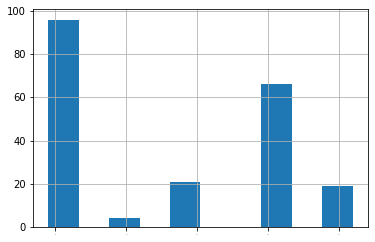

In [ ]:
clustered[clustered['select'] == 1]['clustering_result'].hist()

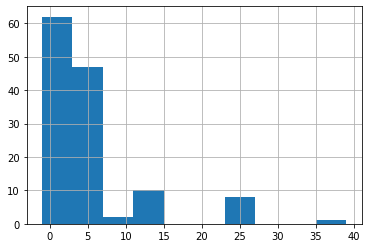

In [ ]:
clustered[clustered['script'] == 1]['clustering_result'].hist()

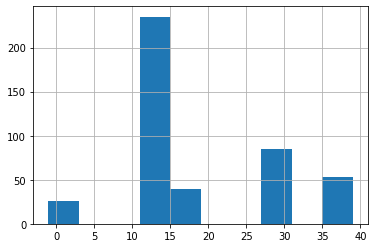

In [ ]:
clustered[clustered['suspicious_meta1'] == 1]['clustering_result'].hist()

In [ ]:
vectorized

,meta1,meta2,meta3,http_code_type,script,<script,</script>,%3c,%3e,%2f,...,ñ,ñ,ø­,ù,û,û¯,ü¨,ý,ý,ý¥
0,REQUEST_GET_ARGS,banner,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RESPONSE_HEADERS,RESPONSE_HEADERS.Date,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,REQUEST_COOKIES,REQUEST_COOKIES.LtpaToken2,302.0,3.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CLIENT_SESSION_ID,Missing,206.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CLIENT_USERAGENT,Missing,301.0,3.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7031,REQUEST_METHOD\';\'REQUEST_CONTE,Missing,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7032,REQUEST_POST_ARGS,REQUEST_POST_ARGS.\0\0\0\0\0\0\0\0\0\0\0\0e#pZ...,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7033,REQUEST_METHOD\';\'REQUEST_CONTE,Missing,302.0,3.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7034,REQUEST_ARGS_KEYS,Ã­Ã¡p3Â´Â¯#Â¶H4ÂKÂ»XJÂ¥Ã¥k_Ã®Ã¼WCÃ»wRÃ¿,200.0,2.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
clustered['meta1'] = clustered['meta1'].astype(str)
clustered['meta2'] = clustered['meta2'].astype(str)
clustered['meta3'] = clustered['meta3'].astype(float)
clustered['http_code_type'] = clustered['http_code_type'].astype(float)

In [ ]:
clustered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6980 entries, 0 to 7035
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   meta1              6980 non-null   object 
 1   meta2              6980 non-null   object 
 2   meta3              6980 non-null   float64
 3   http_code_type     6980 non-null   float64
 4   script             6980 non-null   int64  
 5   <script            6980 non-null   int64  
 6   </script>          6980 non-null   int64  
 7   %3c                6980 non-null   int64  
 8   %3e                6980 non-null   int64  
 9   %2f                6980 non-null   int64  
 10  iframe             6980 non-null   int64  
 11  <iframe            6980 non-null   int64  
 12  </iframe>          6980 non-null   int64  
 13  alert              6980 non-null   int64  
 14  print              6980 non-null   int64  
 15  sleep              6980 non-null   int64  
 16  --                 6980 

С использованием CatBoost создадим модель, которая будет предсказывать класс элемента.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(clustered.drop('clustering_result', axis=1), clustered['clustering_result'], test_size=0.2)

In [ ]:
!pip install catboost

In [ ]:
columns = x_train.columns.values.tolist()
columns

['meta1',
 'meta2',
 'meta3',
 'http_code_type',
 'script',
 '<script',
 '</script>',
 '%3c',
 '%3e',
 '%2f',
 'iframe',
 '<iframe',
 '</iframe>',
 'alert',
 'print',
 'sleep',
 '--',
 '/*',
 '*/',
 'select',
 'union',
 'table',
 'drop',
 'truncate',
 'from',
 'pg_',
 '../../../',
 'xss',
 'sql',
 'suspicious_meta1']

In [ ]:
from catboost import CatBoostClassifier, Pool

pool_train = Pool(x_train, y_train, cat_features=['meta1', 'meta2'])

pool_test = Pool(x_test, cat_features=['meta1', 'meta2'])

cat = CatBoostClassifier(task_type="GPU")
cat.fit(pool_train)

Learning rate set to 0.092185
0:	learn: 3.4587199	total: 1.32s	remaining: 22m 4s
1:	learn: 3.0678540	total: 2.38s	remaining: 19m 48s
2:	learn: 2.7979275	total: 3.55s	remaining: 19m 39s
3:	learn: 2.5536315	total: 4.97s	remaining: 20m 38s
4:	learn: 2.3928226	total: 6.26s	remaining: 20m 45s
5:	learn: 2.2604727	total: 7.69s	remaining: 21m 14s
6:	learn: 2.1358852	total: 9.17s	remaining: 21m 40s
7:	learn: 2.0454775	total: 10.7s	remaining: 22m 8s
8:	learn: 1.9400201	total: 12.3s	remaining: 22m 33s
9:	learn: 1.8688942	total: 13.7s	remaining: 22m 34s
10:	learn: 1.7857307	total: 15s	remaining: 22m 32s
11:	learn: 1.7428213	total: 16.5s	remaining: 22m 38s
12:	learn: 1.6720002	total: 18.2s	remaining: 23m 1s
13:	learn: 1.6038299	total: 19.8s	remaining: 23m 15s
14:	learn: 1.5589956	total: 21.5s	remaining: 23m 30s
15:	learn: 1.5099648	total: 23.2s	remaining: 23m 44s
16:	learn: 1.4669928	total: 24.7s	remaining: 23m 48s
17:	learn: 1.4117828	total: 26.1s	remaining: 23m 44s
18:	learn: 1.3675921	total: 27.

In [ ]:
pred = cat.predict(pool_test)

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score

print('Accuracy:')
print(accuracy_score(y_test, pred))
print('Recall:')
print(recall_score(y_test, pred, average='macro'))
print('Precision:')
print(precision_score(y_test, pred, average='macro'))

Accuracy:
0.9577363896848138
Recall:
0.8642095326655114
Precision:
0.8124734414988651


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
